In [ ]:
import numpy as np
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
x1 = np.arange(30,80,10)
x2 = np.arange(30,80,10)
P_x = 0.2*(np.ones(5))
X1 = rv_discrete(name='X1', values=(x1, P_x))
X2 = rv_discrete(name='X2', values=(x2, P_x))
P_x_3 = np.array([0.04,0.08,0.12,0.16,0.20,0.16,0.12,0.08,0.04])
x3_list = []
for i in x1:
  for j in x2:
    if i+j not in x3_list:
      x3_list.append(i+j)
x3 = np.array(x3_list)
x3 = x3.flatten()
X3 = rv_discrete(name='X3', values=(x3, P_x_3))

In [ ]:
print(P_x.reshape(-1, 1))
print(P_x.reshape(1, -1))
print(P_x.reshape(-1, 1) * P_x.reshape(1, -1))

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]
[[0.2 0.2 0.2 0.2 0.2]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [ ]:
def cdf():
    prob_matrix = P_x.reshape(-1, 1) * P_x.reshape(1, -1)
    cdf_value_list = []
    for i, val1 in enumerate(x1):
        for j, val2 in enumerate(x2):
            cdf_value = 0
            for index1 in range(i+1):
                for index2 in range(j+1):
                    cdf_value += prob_matrix[index1][index2]
            cdf_value_list.append(cdf_value)
    return cdf_value_list

cdf()



[0.04000000000000001,
 0.08000000000000002,
 0.12000000000000002,
 0.16000000000000003,
 0.20000000000000004,
 0.08000000000000002,
 0.16000000000000003,
 0.24000000000000005,
 0.32000000000000006,
 0.40000000000000013,
 0.12000000000000002,
 0.24000000000000005,
 0.3600000000000001,
 0.4800000000000002,
 0.6000000000000003,
 0.16000000000000003,
 0.32000000000000006,
 0.4800000000000002,
 0.6400000000000003,
 0.8000000000000005,
 0.20000000000000004,
 0.40000000000000013,
 0.6000000000000003,
 0.8000000000000005,
 1.0000000000000007]

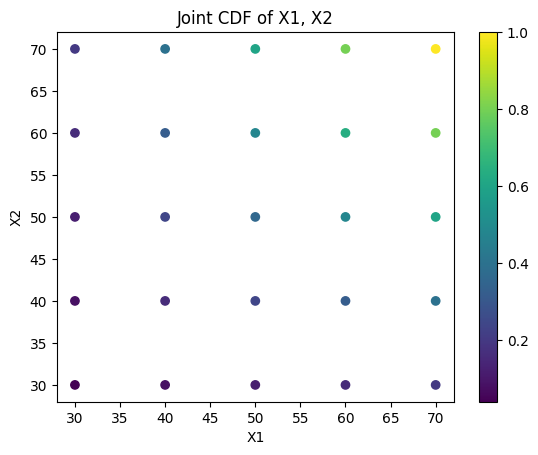

In [ ]:
joint_cdf = np.array(cdf()).reshape(5,5)
fig = plt.figure()
ax = fig.add_subplot()
x, y = np.meshgrid(x1, x2, indexing='ij')
sc = ax.scatter(x.flatten(), y.flatten(), c=joint_cdf.flatten())
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Joint CDF of X1, X2')
fig.colorbar(sc)
plt.show()


In [ ]:
print(joint_cdf)

[[0.04 0.08 0.12 0.16 0.2 ]
 [0.08 0.16 0.24 0.32 0.4 ]
 [0.12 0.24 0.36 0.48 0.6 ]
 [0.16 0.32 0.48 0.64 0.8 ]
 [0.2  0.4  0.6  0.8  1.  ]]


In [ ]:
def compare_tuples(t1, t2):
    for a, b in zip(t1, t2):
        if a < b:
            return False
    return True
def alg():
  k=0
  E = []
  threshold = 0.9


  z1j1 = 0
  z2j2 = 0
  z3j3 = 0
  min_value1 = np.inf
  min_value2 = np.inf
  min_value3 = np.inf
  min_value4 = np.inf
  for i in range(len(x1)):
    if joint_cdf[i][4] >= threshold and joint_cdf[i][4] < min_value1:
      z1j1 = i
      min_value1 = joint_cdf[i][4]
  for i in range(len(x2)):
    if joint_cdf[z1j1][i] >= threshold and joint_cdf[z1j1][i] < min_value2:
      print('i found a point called',(z1j1,i),'with prob.',joint_cdf[z1j1][i],'which means the values of z1= ',x1[z1j1],'z2= ',(x2[i]))
      z2j2 = i
      min_value2 = joint_cdf[z1j1][z2j2]
  my_tuple = (z1j1,z2j2)
  E.append(my_tuple)
  print(E)
  k = k+1
  while z1j1 + k <= 5 and z1j1 + k < len(x1):
    for i in range(len(x2)):
      if joint_cdf[z1j1 + k][i] >= threshold and (z1j1 + k, i) not in E:
        should_add = True
        for elem in E:
          if compare_tuples((z1j1 + k, i), elem):
            should_add = False
        if should_add:
          E.append((z1j1 + k, i))
    k += 1

  return E
func_value = alg()
for i in func_value:
  print('i found a point called',i,'with prob.',joint_cdf[i[0]][i[1]],'which means the values of z1= ',x1[i[0]],'z2= ',(x2[i[1]]))


i found a point called (4, 4) with prob. 1.0000000000000007 which means the values of z1=  70 z2=  70
[(4, 4)]
i found a point called (4, 4) with prob. 1.0000000000000007 which means the values of z1=  70 z2=  70


In [ ]:
def compare_tuples(t1, t2):
    for a, b in zip(t1, t2):
        if a < b:
            return False
    return True

compare_tuples((4,1),(4,0))

True